In [1]:
import pandas as pd
import numpy as numpy
import json 
import os 
import pylab as pl
import urllib
import requests
import geopandas as gp
import fiona
import shapely
from fiona.crs import from_epsg
import os
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.optimize import minimize
from statsmodels.graphics.api import abline_plot
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

%pylab inline

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
path = '/Users/katharinevoorhees/CAPSTONE/nyu_2451_36743/taxi_zones.shp'

taxi = gp.GeoDataFrame.from_file(path)
taxi.head()

In [871]:
os.chdir('/Users/katharinevoorhees/GitHub/Manhattan-Congestion-Surcharge-Capstone/results/Final_results')
!ls

older
readme.md
results_pop_under_wage2_.03_1.5.csv
results_pop_under_wage2_0.05_1.5.csv
results_pop_under_wage3_0.05_1.5.csv
results_pop_under_wage_0.05_1.5.csv
results_pop_under_wage_scenario2_with_scenario1_0.05_1.5.csv
results_pop_under_wage_scenario3_with_scenario1_0.05_1.5.csv
results_scenario1_0.03_1.5.csv
results_scenario1_0.05_1.5.csv
results_scenario2_.03_1.5.csv
results_scenario2_0.03_1.5.csv
results_scenario2_0.05_1.5.csv
results_scenario2_with_scenario1_0.05_1.5.csv
results_scenario3_0.03_1.5.csv
results_scenario3_0.05_1.5.csv
results_scenario3_with_scenario1_0.05_1.5.csv


In [872]:
taxi[taxi.LocationID.isnull()]

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry


In [873]:
results = pd.read_csv('results_scenario3_with_scenario1_0.05_1.5.csv')
results.shape

(55798, 7)

In [874]:
os.chdir('/Users/katharinevoorhees/GitHub/Manhattan-Congestion-Surcharge-Capstone/results/Final_results/')

results_sq = pd.read_csv('results_scenario1_0.05_1.5.csv')
results_275 = pd.read_csv('results_scenario2_0.05_1.5.csv')
results_10 = pd.read_csv('results_scenario3_with_scenario1_0.05_1.5.csv')


In [875]:
results_sq.rename_axis({'Unnamed: 0':'ODpair'},axis=1,inplace=True)
results_275.rename_axis({'Unnamed: 0':'ODpair'},axis=1,inplace=True)
results_10.rename_axis({'Unnamed: 0':'ODpair'},axis=1,inplace=True)

/Users/katharinevoorhees/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  """Entry point for launching an IPython kernel.
/Users/katharinevoorhees/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  
/Users/katharinevoorhees/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [876]:
results_sq['origin'] = results_sq.ODpair.apply(lambda x: x.split('-')[0])
results_275['origin'] = results_sq.ODpair.apply(lambda x: x.split('-')[0])
results_10['origin'] = results_sq.ODpair.apply(lambda x: x.split('-')[0])

results_sq['destination'] = results_sq.ODpair.apply(lambda x: x.split('-')[1])
results_275['destination'] = results_sq.ODpair.apply(lambda x: x.split('-')[1])
results_10['destination'] = results_sq.ODpair.apply(lambda x: x.split('-')[1])

In [877]:
results_sq.shape

(55798, 9)

In [878]:
dfs = [results_10, results_sq, results_275]
tags = ['10','sq','275']

for df, tag in zip(dfs,tags): 
    df['P(mode4)'+tag] = df['P(mode4)']
    df['P(mode6)'+tag] = df['P(mode6)']
    df['all_cars'+tag] = df['P(mode1)'] + df['P(mode2)'] + df['P(mode3)'] + df['P(mode6)']
    df['nest1_all_'+tag] = df['P(mode1)'] + df['P(mode2)'] + df['P(mode3)']
    df['taxi+fhv_'+tag] = df['P(mode1)'] + df['P(mode2)']
    df['total_'+tag] =  df['P(mode1)'] + df['P(mode2)'] + df['P(mode3)'] + df['P(mode4)'] +\
                            df['P(mode5)'] + df['P(mode6)']
    df['LocationID'] = df['origin'].astype('int')

results_10 = results_10[['LocationID','all_cars10', 'nest1_all_10', 'taxi+fhv_10', 'total_10','P(mode4)10', 'P(mode6)10']]
results_sq = results_sq[['LocationID','all_carssq', 'nest1_all_sq', 'taxi+fhv_sq', 'total_sq','P(mode4)sq','P(mode6)sq']]
results_275 = results_275[['LocationID', 'all_cars275','nest1_all_275', 'taxi+fhv_275', 'total_275','P(mode4)275','P(mode6)275']]

In [879]:
results_sq = results_sq.groupby('LocationID').sum().reset_index()

In [880]:
results_10 = results_10.groupby('LocationID').sum().reset_index()

In [881]:
results_275 = results_275.groupby('LocationID').sum().reset_index()

In [882]:
combined = results_sq.merge(results_10, on="LocationID")

In [883]:
combined = combined.merge(results_275, on='LocationID')

In [884]:
print(combined['nest1_all_10'].sum())
print(combined['nest1_all_275'].sum())
print(combined['nest1_all_sq'].sum())

33912.57513831167
43956.13349312517
66518.55757752096


In [885]:
print(combined['all_cars10'].sum())
print(combined['all_cars275'].sum())
print(combined['all_carssq'].sum())

1081764.3988350339
1184876.1615816983
1204954.8668032314


In [886]:
print(results_10['P(mode6)10'].sum())
print(results_275['P(mode6)275'].sum())
print(results_sq['P(mode6)sq'].sum())

1047851.8236967222
1140920.0280885734
1138436.3092257103


In [887]:
print(results_10['P(mode4)10'].sum())
print(results_275['P(mode4)275'].sum())
print(results_sq['P(mode4)sq'].sum())

1568531.5772572262
1466962.6905047994
1448265.885974967


In [888]:
combined = combined.dropna(subset=['LocationID'])

In [889]:
taxi = taxi.merge(combined, on="LocationID", how='left')
    
taxi.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,all_carssq,nest1_all_sq,taxi+fhv_sq,total_sq,P(mode4)sq,P(mode6)sq,all_cars10,nest1_all_10,taxi+fhv_10,total_10,P(mode4)10,P(mode6)10,all_cars275,nest1_all_275,taxi+fhv_275,total_275,P(mode4)275,P(mode6)275
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"(POLYGON ((1033269.243591294 172126.0078125, 1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,...",3943.959761,112.299937,112.282368,8706.0,4008.909286,3831.659823,3811.965927,112.299937,112.282368,8706.0,4140.903120,3699.665990,3262.588227,598.837968,597.173971,10762.0,5017.141841,2663.750259
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,...",4410.486753,1531.446331,1531.444957,10617.0,3592.415229,2879.040422,1572.712749,76.938337,19.337768,10617.0,6241.153670,1495.774411,6211.490573,131.430873,117.673788,33790.0,25977.794464,6080.059700
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ...",5043.279390,43.328966,41.423708,8228.0,2794.741855,4999.950424,4853.074192,43.328966,41.423708,8228.0,2983.824216,4809.745226,1560.316241,11.985222,9.004670,8833.0,6511.086411,1548.331020


In [890]:
taxi['ch_nest_1_275'] = np.round(taxi['nest1_all_275'] - taxi['nest1_all_sq'])
taxi['ch_nest_1_10'] = np.round(taxi['nest1_all_10'] - taxi['nest1_all_sq'])
taxi['ch_cars_10'] = np.round(taxi['all_cars10'] - taxi['all_carssq'])
taxi['ch_cars_275'] = np.round(taxi['all_cars275'] - taxi['all_carssq'])
taxi['perc_ch_nest_1_275'] = abs(np.round(((taxi['ch_nest_1_275']/taxi['nest1_all_sq'])*100), 2))
taxi['perc_ch_nest_1_10'] = abs(np.round(((taxi['ch_nest_1_10']/taxi['nest1_all_sq'])*100), 2))
taxi['perc_ch_275'] = abs(np.round(((taxi['ch_nest_1_275']/taxi['total_sq'])*100), 2))
taxi['perc_ch_10'] = abs(np.round(((taxi['ch_nest_1_10']/taxi['total_sq'])*100), 2))
taxi['perc_ch_cars_275']= abs(np.round(((taxi['ch_cars_275']/taxi['total_sq'])*100), 2))
taxi['perc_ch_cars_10'] = abs(np.round(((taxi['ch_cars_10']/taxi['total_sq'])*100), 2))
taxi.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,all_carssq,nest1_all_sq,taxi+fhv_sq,total_sq,P(mode4)sq,P(mode6)sq,all_cars10,nest1_all_10,taxi+fhv_10,total_10,P(mode4)10,P(mode6)10,all_cars275,nest1_all_275,taxi+fhv_275,total_275,P(mode4)275,P(mode6)275,ch_nest_1_275,ch_nest_1_10,ch_cars_10,ch_cars_275,perc_ch_nest_1_275,perc_ch_nest_1_10,perc_ch_275,perc_ch_10,perc_ch_cars_275,perc_ch_cars_10
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"(POLYGON ((1033269.243591294 172126.0078125, 1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,...",3943.959761,112.299937,112.282368,8706.0,4008.909286,3831.659823,3811.965927,112.299937,112.282368,8706.0,4140.903120,3699.665990,3262.588227,598.837968,597.173971,10762.0,5017.141841,2663.750259,487.0,0.0,-132.0,-681.0,433.66,0.00,5.59,0.0,7.82,1.52
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,...",4410.486753,1531.446331,1531.444957,10617.0,3592.415229,2879.040422,1572.712749,76.938337,19.337768,10617.0,6241.153670,1495.774411,6211.490573,131.430873,117.673788,33790.0,25977.794464,6080.059700,-1400.0,-1455.0,-2838.0,1801.0,91.42,95.01,13.19,13.7,16.96,26.73
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ...",5043.279390,43.328966,41.423708,8228.0,2794.741855,4999.950424,4853.074192,43.328966,41.423708,8228.0,2983.824216,4809.745226,1560.316241,11.985222,9.004670,8833.0,6511.086411,1548.331020,-31.0,0.0,-190.0,-3483.0,71.55,0.00,0.38,0.0,42.33,2.31


In [891]:
os.chdir('/Users/katharinevoorhees/GitHub/Manhattan-Congestion-Surcharge-Capstone/cleaned_data/')

data = pd.read_csv('taxi_zone_wages_raw.csv')
#data = data[['w_taxi_zone','h_taxi_zone','S000']]
data.head()

,DOlocationID,PUlocationID,LEHD_total_pair_count,2500,7500,12500,17500,22500,30000,42500,62500,87500,125000,225000,median_household_income
0,3.0,4.0,1,0.070217,0.083930,0.116010,0.065062,0.063911,0.082528,0.103498,0.139483,0.068065,0.119664,0.087633,57788.0
1,3.0,5.0,2,0.044209,0.035588,0.066976,0.047745,0.048408,0.114279,0.224580,0.345491,0.212865,0.399867,0.459991,81420.5
2,3.0,6.0,1,0.050462,0.032627,0.046169,0.041018,0.038325,0.068415,0.087890,0.119658,0.118487,0.151192,0.245756,67361.0
3,3.0,7.0,7,0.257919,0.285195,0.333903,0.297581,0.234586,0.423943,0.596832,0.848628,0.724122,1.033718,1.963572,79656.0
4,3.0,9.0,3,0.096439,0.044976,0.077411,0.099034,0.095574,0.175580,0.358945,0.562635,0.358945,0.587286,0.543174,76912.0


In [892]:
under_60th = [12, 88, 261, 13, 87, 209, 231, 45, 232, 148, 144, 211, 125, 158, 
              249, 114, 113, 79, 4, 224, 107, 234, 90, 68, 246, 186, 164, 100,
              170, 137, 233, 162, 161, 230, 48, 50, 163, 229]

In [893]:
data['PUlocationID'] = data.PUlocationID.astype('int')
data['DOlocationID'] = data.DOlocationID.astype('int')

In [894]:
data['PU_in_zone'] = np.where(data.PUlocationID.isin(under_60th), 1, 0)
data['DO_in_zone'] = np.where(data.DOlocationID.isin(under_60th), 1, 0)

In [895]:
data.head()

,DOlocationID,PUlocationID,LEHD_total_pair_count,2500,7500,12500,17500,22500,30000,42500,62500,87500,125000,225000,median_household_income,PU_in_zone,DO_in_zone
0,3,4,1,0.070217,0.083930,0.116010,0.065062,0.063911,0.082528,0.103498,0.139483,0.068065,0.119664,0.087633,57788.0,1,0
1,3,5,2,0.044209,0.035588,0.066976,0.047745,0.048408,0.114279,0.224580,0.345491,0.212865,0.399867,0.459991,81420.5,0,0
2,3,6,1,0.050462,0.032627,0.046169,0.041018,0.038325,0.068415,0.087890,0.119658,0.118487,0.151192,0.245756,67361.0,0,0
3,3,7,7,0.257919,0.285195,0.333903,0.297581,0.234586,0.423943,0.596832,0.848628,0.724122,1.033718,1.963572,79656.0,0,0
4,3,9,3,0.096439,0.044976,0.077411,0.099034,0.095574,0.175580,0.358945,0.562635,0.358945,0.587286,0.543174,76912.0,0,0


In [896]:
work_in_zone = data[data.DO_in_zone == 1].LEHD_total_pair_count.sum() / data.LEHD_total_pair_count.sum()
work_in_zone = np.round(work_in_zone*100)
print(work_in_zone, 'percent of total nyc commuters work in the congestion zone')

46.0 percent of total nyc commuters work in the congestion zone


In [897]:
perc_in = data.groupby(['PUlocationID','DO_in_zone']).sum().reset_index()[['PUlocationID','DO_in_zone','LEHD_total_pair_count']]

In [898]:
perc_in.head()

,PUlocationID,DO_in_zone,LEHD_total_pair_count
0,2,0,51
1,2,1,27
2,3,0,5986
3,3,1,2720
4,4,0,3354


In [899]:
zone = []
perc_in_zone = []

for loc_id in data.PUlocationID.unique():
    zoneid = loc_id
    yes = data[(data.PUlocationID == loc_id) & (data.DO_in_zone == 1) ].LEHD_total_pair_count.sum()
    no = data[(data.PUlocationID == loc_id) & (data.DO_in_zone == 0) ].LEHD_total_pair_count.sum()
    perc = yes / (yes+no)
    zone.append(zoneid)
    perc_in_zone.append(perc)

In [900]:
d = {'taxi_zone':zone, 'prop_w_in_congest': perc_in_zone}
prop_df = pd.DataFrame(d)
prop_df['prop_w_in_congest'] = np.round((prop_df.prop_w_in_congest * 100),2)
prop_df.head()

,taxi_zone,prop_w_in_congest
0,4,68.41
1,5,30.95
2,6,35.04
3,7,59.33
4,9,32.30


In [916]:
prop_df['class'] = pd.qcut(prop_df.prop_w_in_congest,4,labels=False)
prop_df.head()

,taxi_zone,prop_w_in_congest,class
0,4,68.41,3
1,5,30.95,0
2,6,35.04,1
3,7,59.33,3
4,9,32.30,0


In [918]:
prop_df['class'].value_counts()

0    66
3    65
2    65
1    64
Name: class, dtype: int64

In [921]:
prop_df.to_csv('percent_working_in_zone.csv')

In [923]:
os.getcwd()

'/Users/katharinevoorhees/GitHub/Manhattan-Congestion-Surcharge-Capstone/cleaned_data'

In [901]:
taxi = taxi.merge(prop_df, right_on='taxi_zone', left_on='LocationID', how='left')

/Users/katharinevoorhees/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


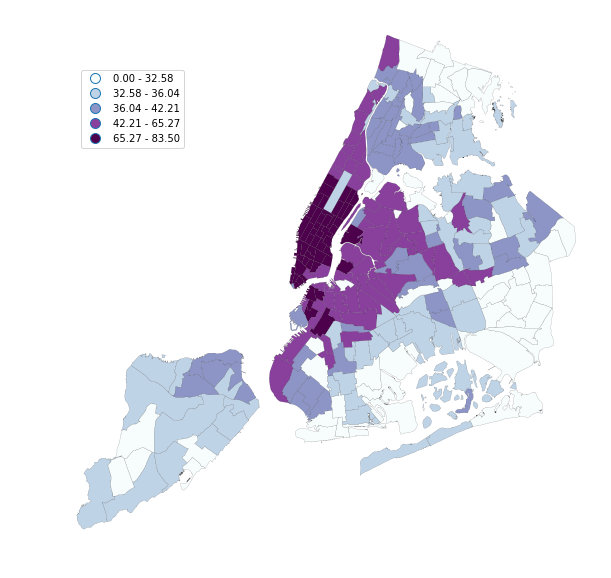

In [902]:
#taxi zones shaded by percent of residents who work in congestion zone under 60th st.

fig = taxi.dropna(subset=['prop_w_in_congest']).plot(column='prop_w_in_congest',cmap='BuPu',alpha=1, edgecolor='black',
                linewidth=0.1,scheme= 'quantiles', legend=True, k=5, figsize=(10,10))
fig.axis('off');
leg = fig.get_legend()
leg.set_bbox_to_anchor((0,-.1,.25,1))

In [903]:
taxi[taxi.prop_w_in_congest.isnull()]

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,all_carssq,nest1_all_sq,taxi+fhv_sq,total_sq,P(mode4)sq,P(mode6)sq,all_cars10,nest1_all_10,taxi+fhv_10,total_10,P(mode4)10,P(mode6)10,all_cars275,nest1_all_275,taxi+fhv_275,total_275,P(mode4)275,P(mode6)275,ch_nest_1_275,ch_nest_1_10,ch_cars_10,ch_cars_275,perc_ch_nest_1_275,perc_ch_nest_1_10,perc_ch_275,perc_ch_10,perc_ch_cars_275,perc_ch_cars_10,taxi_zone,prop_w_in_congest
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,103,0.014306,0.000006,Governor's Island/Ellis Island/Liberty Island,103,Manhattan,"POLYGON ((972079.5745868832 190732.4293469787,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,104,0.021221,0.000012,Governor's Island/Ellis Island/Liberty Island,103,Manhattan,"POLYGON ((973172.6661827862 194632.3480884731,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,105,0.077425,0.000369,Governor's Island/Ellis Island/Liberty Island,103,Manhattan,"POLYGON ((979605.7587890774 191880.5750121921,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [904]:
taxi.crs

{'init': 'epsg:2263'}

/Users/katharinevoorhees/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


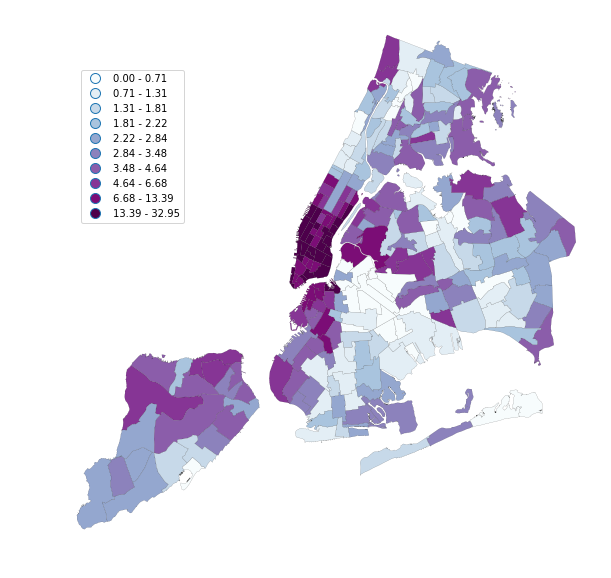

In [905]:
#taxi zones shaded by percent change in mode under $10 surcharge scenario 

fig = taxi.dropna(subset=['perc_ch_cars_275']).plot(column='perc_ch_cars_10',cmap='BuPu',alpha=1, edgecolor='black',
                linewidth=0.1,scheme= 'quantiles', legend=True, k=10, figsize=(10,10))
fig.axis('off');
leg = fig.get_legend()
leg.set_bbox_to_anchor((0,-.1,.25,1))

In [906]:
taxi[taxi.perc_ch_nest_1_275 > 100]

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,all_carssq,nest1_all_sq,taxi+fhv_sq,total_sq,P(mode4)sq,P(mode6)sq,all_cars10,nest1_all_10,taxi+fhv_10,total_10,P(mode4)10,P(mode6)10,all_cars275,nest1_all_275,taxi+fhv_275,total_275,P(mode4)275,P(mode6)275,ch_nest_1_275,ch_nest_1_10,ch_cars_10,ch_cars_275,perc_ch_nest_1_275,perc_ch_nest_1_10,perc_ch_275,perc_ch_10,perc_ch_cars_275,perc_ch_cars_10,taxi_zone,prop_w_in_congest
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,...",3943.959761,112.299937,112.282368,8706.0,4008.909286,3831.659823,3811.965927,112.299937,1.122824e+02,8706.0,4140.903120,3699.665990,3262.588227,598.837968,597.173971,10762.0,5017.141841,2663.750259,487.0,0.0,-132.0,-681.0,433.66,0.00,5.59,0.00,7.82,1.52,3.0,31.24
5,6,0.150491,0.000606,Arrochar/Fort Wadsworth,6,Staten Island,"POLYGON ((966568.7466657609 158679.854687795, ...",2822.916596,254.072052,229.759744,5269.0,2275.062656,2568.844544,2687.238572,248.741594,2.244293e+02,5269.0,2410.740680,2438.496978,6371.608768,655.126172,557.275956,22397.0,15013.418284,5716.482596,401.0,-5.0,-136.0,3549.0,157.83,1.97,7.61,0.09,67.36,2.58,6.0,35.04
15,16,0.141292,0.000872,Bayside,16,Queens,"POLYGON ((1048344.039282173 223210.6211042106,...",9279.094964,288.049145,288.049113,12956.0,2894.141201,8991.045818,8669.856879,282.910508,2.829105e+02,12956.0,3498.713727,8386.946372,3199.136974,1214.897736,1100.676991,26059.0,21950.095891,1984.239237,927.0,-5.0,-609.0,-6080.0,321.82,1.74,7.15,0.04,46.93,4.70,16.0,34.26
20,21,0.115974,0.000380,Bensonhurst East,21,Brooklyn,"POLYGON ((991418.0430896282 161321.4343791008,...",8204.786167,180.345523,178.868356,21098.0,9508.492863,8024.440644,7948.412555,180.345523,1.788684e+02,21098.0,9764.849163,7768.067032,2318.112838,626.804625,626.804625,13761.0,11118.774363,1691.308212,446.0,0.0,-256.0,-5887.0,247.30,0.00,2.11,0.00,27.90,1.21,21.0,38.82
23,24,0.047000,0.000061,Bloomingdale,24,Manhattan,"POLYGON ((995453.1139255464 230274.2667761594,...",1679.927176,325.535450,325.503157,6856.0,4925.510710,1354.391726,1546.358300,321.920355,3.218880e+02,6856.0,5059.079582,1224.437945,4947.530766,1187.582593,1045.945408,19527.0,13936.473711,3759.948173,862.0,-4.0,-134.0,3268.0,264.79,1.23,12.57,0.06,47.67,1.95,24.0,55.12
26,27,0.202509,0.001341,Breezy Point/Fort Tilden/Riis Beach,27,Queens,"POLYGON ((1021692.96872507 147138.6642488837, ...",873.125301,43.680770,43.679992,1142.0,0.000000,829.444531,853.781560,22.432742,2.243196e+01,1142.0,0.000000,831.348818,908.252481,179.635177,176.537685,5485.0,4472.829529,728.617304,136.0,-21.0,-19.0,35.0,311.35,48.08,11.91,1.84,3.06,1.66,27.0,35.38
27,28,0.097961,0.000291,Briarwood/Jamaica Hills,28,Queens,"POLYGON ((1041798.318280578 200273.1431976855,...",5417.164860,29.841994,29.740437,13294.0,6888.344445,5387.322866,5167.562537,29.841994,2.974044e+01,13294.0,7137.946701,5137.720543,1552.152907,290.011263,209.069193,26138.0,23732.841027,1262.141643,260.0,0.0,-250.0,-3865.0,871.26,0.00,1.96,0.00,29.07,1.88,28.0,42.40
29,30,0.094510,0.000146,Broad Channel,30,Queens,"POLYGON ((1034013.271803156 163473.1523993015,...",460.181700,0.000980,0.000689,817.0,240.552855,460.180720,434.110358,0.000980,6.885776e-04,817.0,264.213823,434.109379,2324.785481,25.548824,25.457251,30788.0,28233.989304,2299.236657,26.0,0.0,-26.0,1865.0,2654105.09,0.00,3.18,0.00,228.27,3.18,30.0,37.45
30,31,0.096425,0.000334,Bronx Park,31,Bronx,"POLYGON ((1019950.153997973 251628.997190699, ...",171.151307,12.308641,12.301988,316.0,120.473685,158.842666,157.454395,12.308641,1.230199e+01,316.0,133.841322,145.145754,383.319427,34.874382,34.816966,1625.0,1145.427132,348.445046,23.0,0.0,-14.0,212.0,186.86,0.00,7.28,0.00,67.09,4.43,31.0,37.03
31,32,0.054267,0.000151,Bronxdale,32,Bronx,"POLYGON ((1023302.250151321 251923.9176614732,...",4236.463271,121.499081,112.927233,10316.0,5187.300361,4114.964190,4066.786207,121.499081,1.129272e+02,10316.0,5356.977275,3945.287126,3420.213376,467.

In [909]:
taxi_lin = taxi[taxi['perc_ch_10'].notnull()]

In [915]:
taxi_lin['perc_private'] = (taxi_lin['P(mode6)sq'] /taxi_lin['total_sq'] ) *100
taxi_lin['perc_public'] = (taxi_lin['P(mode4)sq'] /taxi_lin['total_sq'] ) *100

/Users/katharinevoorhees/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/katharinevoorhees/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


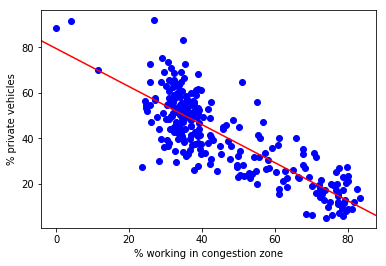

In [913]:
f, ax = plt.subplots()

ax.scatter(taxi_lin['prop_w_in_congest'], taxi_lin['perc_private'],
                color='b')
mod = smf.ols(formula='perc_private ~ prop_w_in_congest', 
              data = taxi_lin).fit()
abline_plot(model_results=mod,ax=ax, color='red')
ax.set_ylabel('% private vehicles')
ax.set_xlabel('% working in congestion zone');

In [924]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           perc_private   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     528.2
Date:                Sun, 21 Jul 2019   Prob (F-statistic):           4.43e-64
Time:                        20:31:23   Log-Likelihood:                -960.30
No. Observations:                 257   AIC:                             1925.
Df Residuals:                     255   BIC:                             1932.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            79.5556      1.785     44.557      0.000      76.039      83.072
prop_w_in_congest    -0.8376      0.036    -22.983      0.000      -0.909      -0.766
==============================================================================
Omnibus:                        4.297   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.117   Jarque-Bera (JB):                4.281
Skew:                           0.205   Prob(JB):                        0.118
Kurtosis:                       3.481   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

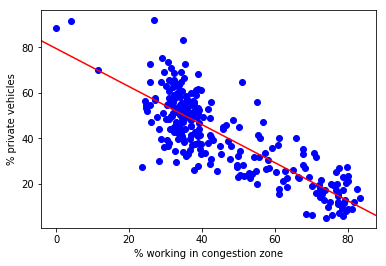

In [925]:
f, ax = plt.subplots()

ax.scatter(taxi_lin['prop_w_in_congest'], taxi_lin['perc_private'],
                color='b')
mod = smf.ols(formula='perc_private ~ prop_w_in_congest', 
              data = taxi_lin).fit()
abline_plot(model_results=mod,ax=ax, color='red')
ax.set_ylabel('% private vehicles')
ax.set_xlabel('% working in congestion zone');

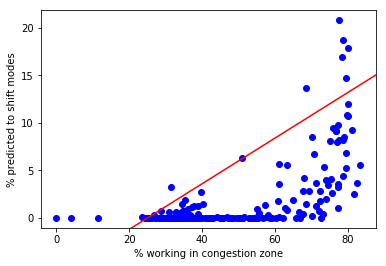

In [926]:
f, ax = plt.subplots()

ax.scatter(taxi_lin['prop_w_in_congest'], taxi_lin['perc_ch_10'],
                color='b')
mod = smf.ols(formula='perc_ch_cars_10 ~ prop_w_in_congest', 
              data = taxi_lin).fit()
abline_plot(model_results=mod,ax=ax, color='red')
ax.set_ylabel('% predicted to shift modes')
ax.set_xlabel('% working in congestion zone');

In [927]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        perc_ch_cars_10   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     253.8
Date:                Sun, 21 Jul 2019   Prob (F-statistic):           4.00e-40
Time:                        20:31:23   Log-Likelihood:                -733.55
No. Observations:                 257   AIC:                             1471.
Df Residuals:                     255   BIC:                             1478.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -6.0335      0.739     -8.166      0.000      -7.489      -4.578
prop_w_in_congest     0.2403      0.015     15.930      0.000       0.211       0.270
==============================================================================
Omnibus:                      106.117   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              480.141
Skew:                           1.649   Prob(JB):                    5.48e-105
Kurtosis:                       8.827   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [928]:
taxi_lin['y_pred'] = mod.predict()

/Users/katharinevoorhees/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [929]:
taxi_lin.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,all_carssq,nest1_all_sq,taxi+fhv_sq,total_sq,P(mode4)sq,P(mode6)sq,all_cars10,nest1_all_10,taxi+fhv_10,total_10,P(mode4)10,P(mode6)10,all_cars275,nest1_all_275,taxi+fhv_275,total_275,P(mode4)275,P(mode6)275,ch_nest_1_275,ch_nest_1_10,ch_cars_10,ch_cars_275,perc_ch_nest_1_275,perc_ch_nest_1_10,perc_ch_275,perc_ch_10,perc_ch_cars_275,perc_ch_cars_10,taxi_zone,prop_w_in_congest,perc_private,perc_public,y_pred
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,...",3943.959761,112.299937,112.282368,8706.0,4008.909286,3831.659823,3811.965927,112.299937,112.282368,8706.0,4140.903120,3699.665990,3262.588227,598.837968,597.173971,10762.0,5017.141841,2663.750259,487.0,0.0,-132.0,-681.0,433.66,0.00,5.59,0.00,7.82,1.52,3.0,31.24,44.011714,46.047660,1.472253
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,...",4410.486753,1531.446331,1531.444957,10617.0,3592.415229,2879.040422,1572.712749,76.938337,19.337768,10617.0,6241.153670,1495.774411,6211.490573,131.430873,117.673788,33790.0,25977.794464,6080.059700,-1400.0,-1455.0,-2838.0,1801.0,91.42,95.01,13.19,13.70,16.96,26.73,4.0,68.41,27.117269,33.836444,10.402808
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ...",5043.279390,43.328966,41.423708,8228.0,2794.741855,4999.950424,4853.074192,43.328966,41.423708,8228.0,2983.824216,4809.745226,1560.316241,11.985222,9.004670,8833.0,6511.086411,1548.331020,-31.0,0.0,-190.0,-3483.0,71.55,0.00,0.38,0.00,42.33,2.31,5.0,30.95,60.767506,33.966235,1.402576
5,6,0.150491,0.000606,Arrochar/Fort Wadsworth,6,Staten Island,"POLYGON ((966568.7466657609 158679.854687795, ...",2822.916596,254.072052,229.759744,5269.0,2275.062656,2568.844544,2687.238572,248.741594,224.429286,5269.0,2410.740680,2438.496978,6371.608768,655.126172,557.275956,22397.0,15013.418284,5716.482596,401.0,-5.0,-136.0,3549.0,157.83,1.97,7.61,0.09,67.36,2.58,6.0,35.04,48.753929,43.178263,2.385250
6,7,0.107417,0.000390,Astoria,7,Queens,"POLYGON ((1010804.217962816 218919.6406951398,...",13813.693775,708.248129,705.193075,36688.0,21513.776959,13105.445646,12336.613580,707.963845,704.908791,36688.0,22990.856867,11628.649734,3964.981272,135.013761,135.013733,30224.0,23878.554154,3829.967512,-573.0,-0.0,-1477.0,-9849.0,80.90,0.00,1.56,0.00,26.85,4.03,7.0,59.33,35.721341,58.639819,8.221225


In [930]:
taxi_lin['dif_from_predict'] = taxi_lin.perc_ch_10 - taxi_lin.y_pred
taxi_lin.sort_values('dif_from_predict', ascending=False)

/Users/katharinevoorhees/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,all_carssq,nest1_all_sq,taxi+fhv_sq,total_sq,P(mode4)sq,P(mode6)sq,all_cars10,nest1_all_10,taxi+fhv_10,total_10,P(mode4)10,P(mode6)10,all_cars275,nest1_all_275,taxi+fhv_275,total_275,P(mode4)275,P(mode6)275,ch_nest_1_275,ch_nest_1_10,ch_cars_10,ch_cars_275,perc_ch_nest_1_275,perc_ch_nest_1_10,perc_ch_275,perc_ch_10,perc_ch_cars_275,perc_ch_cars_10,taxi_zone,prop_w_in_congest,perc_private,perc_public,y_pred,dif_from_predict
136,137,0.046108,0.000116,Kips Bay,137,Manhattan,"POLYGON ((991954.7283935696 209026.4620361179,...",4799.584955,2233.738230,2.232812e+03,9551.0,2303.907446,2565.846724,1810.586004,247.550725,1.330403e-28,9551.0,4978.182118,1563.035280,2513.596999,319.886578,319.869191,3252.0,641.075216,2193.710420,-1914.0,-1986.0,-2989.0,-2286.0,85.69,88.91,20.04,20.79,23.93,31.30,137.0,77.66,26.864692,24.122159,12.625236,8.164764
109,110,0.103946,0.000526,Great Kills Park,110,Staten Island,"POLYGON ((951420.0923152268 139894.411383003, ...",15.918620,0.000144,1.351999e-05,18.0,0.351290,15.918476,15.918620,0.000144,1.351999e-05,18.0,0.351290,15.918476,471.669009,0.000000,0.000000,739.0,247.781392,471.669009,-0.0,0.0,0.0,456.0,0.00,0.00,0.00,0.00,2533.33,0.00,110.0,0.00,88.435978,1.951609,-6.033547,6.033547
223,224,0.044020,0.000098,Stuy Town/Peter Cooper Village,224,Manhattan,"POLYGON ((991147.7025319338 207200.0713435411,...",3798.112477,1721.721394,1.715962e+03,9043.0,3789.820809,2076.391082,924.594260,25.253108,2.010311e-05,9043.0,6469.772889,899.341153,11456.701878,428.766068,428.747346,15404.0,2947.997690,11027.935810,-1293.0,-1696.0,-2874.0,7659.0,75.10,98.51,14.30,18.75,84.70,31.78,224.0,78.73,22.961308,41.908889,12.882317,5.867683
198,199,0.077809,0.000289,Rikers Island,199,Bronx,"POLYGON ((1015023.713440001 230286.7592163086,...",733.400397,1.190723,4.596228e-01,800.0,33.548092,732.209675,726.379418,0.731100,2.186623e-09,800.0,40.569071,725.648318,6504.714506,64.350243,64.350235,7646.0,644.130430,6440.364264,63.0,-0.0,-7.0,5771.0,5290.90,0.00,7.88,0.00,721.38,0.88,199.0,4.12,91.526209,4.193512,-5.043665,5.043665
169,170,0.045769,0.000074,Murray Hill,170,Manhattan,"POLYGON ((991999.2986085415 210994.7388307899,...",5059.619658,2381.987954,2.380529e+03,11555.0,3449.967213,2677.631704,1252.487537,320.984988,1.326100e-28,11555.0,6941.771047,931.502549,5770.496509,3.998580,3.659361,7535.0,842.389701,5766.497930,-2378.0,-2061.0,-3807.0,711.0,99.83,86.52,20.58,17.84,6.15,32.95,170.0,80.00,23.172927,29.856921,13.187450,4.652550
47,48,0.043747,0.000094,Clinton East,48,Manhattan,"POLYGON ((986694.3125067502 214463.8461607993,...",4459.502148,2923.253921,2.891201e+03,16710.0,11511.604296,1536.248227,673.410108,92.461798,6.471470e-05,16710.0,15283.495987,580.948310,1559.192072,183.105698,144.001723,10178.0,7191.619192,1376.086374,-2740.0,-2831.0,-3786.0,-2900.0,93.73,96.84,16.40,16.94,17.35,22.66,48.0,78.51,9.193586,68.890510,12.829459,4.110541
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,...",4410.486753,1531.446331,1.531445e+03,10617.0,3592.415229,2879.040422,1572.712749,76.938337,1.933777e+01,10617.0,6241.153670,1495.774411,6211.490573,131.430873,117.673788,33790.0,25977.794464,6080.059700,-1400.0,-1455.0,-2838.0,1801.0,91.42,95.01,13.19,13.70,16.96,26.73,4.0,68.41,27.117269,33.836444,10.402808,3.297192
239,240,0.146070,0.000722,Van Cortlandt Park,240,Bronx,"POLYGON ((1018410.343897685 266056.2902376503,...",70.803738,4.139035,4.139035e+00,95.0,17.067725,66.664702,69.320990,4.139035,4.139035e+00,95.0,18.550473,65.181954,1217.888290,0.000024,0.000017,1450.0,210.387582,1217.888267,-4.0,0.0,-1.0,1147.0,96.64,0.00,4.21,0.00,1207.37,1.05,240.0,11.58,70.173371,17.966026,-3.251307,3.251307
110,111,0.059931,0.000209,Green-Wood Cemetery,111,Brooklyn,"POLYGON ((985590.3814979494 179611.8201743513,...",117.000137,8.986196,8.648006e+00,152.0,31.515245,108.013941,110.429568,4.039935,3.701744e+00,152.0,38.077370,106.389633,1

/Users/katharinevoorhees/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


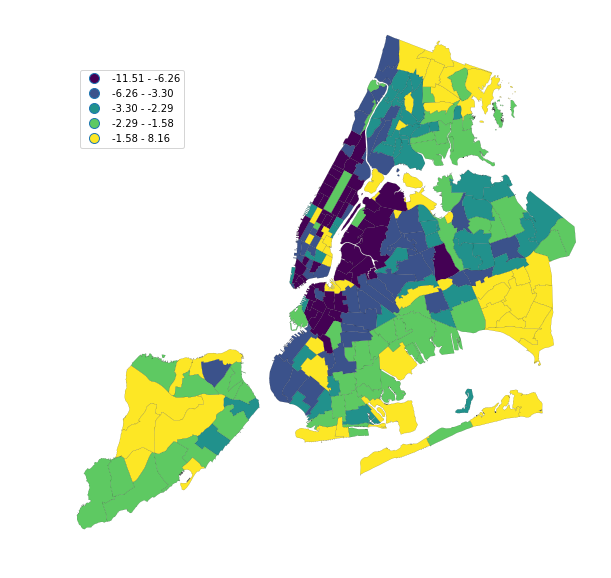

In [931]:
#taxi zones shaded by difference from lin regres y value

fig = taxi_lin.dropna().plot(column='dif_from_predict',cmap='viridis',alpha=1, edgecolor='black',
                linewidth=0.1,scheme= 'quantiles', legend=True, k=5, figsize=(10,10))
fig.axis('off');
leg = fig.get_legend()
leg.set_bbox_to_anchor((0,-.1,.25,1))

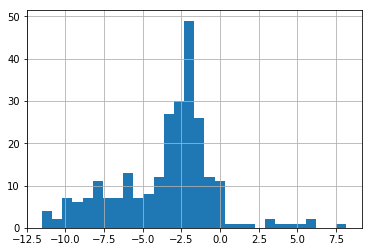

In [932]:
taxi_lin.dif_from_predict.hist(bins=30)

In [933]:
taxi_lin.dif_from_predict.std() * 2

6.415150331514522

In [934]:
over_change = taxi_lin[(abs(taxi_lin.dif_from_predict) > (taxi_lin.dif_from_predict.std() * 2)) & (taxi_lin.total_10 > 1000)]

In [935]:
url = 'https://data.cityofnewyork.us/api/geospatial/3qz8-muuu?method=export&format=Shapefile'
subway = gp.GeoDataFrame.from_file(url)

In [936]:
subway.to_crs(epsg=2263, inplace=True)
subway.crs

{'init': 'epsg:2263', 'no_defs': True}

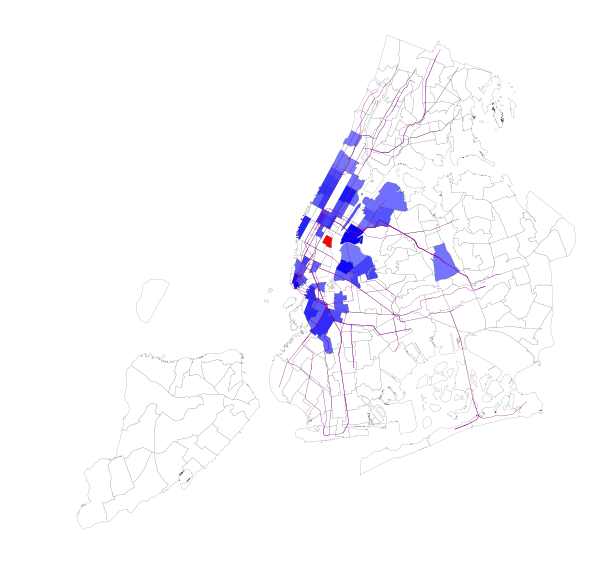

In [937]:
#taxi zones with more or less change than explained by % working in congestion zone
#what are the other characteristics of these zones?

ax = taxi.plot(facecolor='w', edgecolor='k',linewidth=0.1,figsize=(10,10))
over_change.plot(edgecolor='black',column='dif_from_predict',cmap='bwr', ax=ax,linewidth=0.1)
subway.plot(ax=ax, linewidth=.3, edgecolor='darkmagenta')

ax.axis('off');


In [938]:
path = '/Users/katharinevoorhees/CAPSTONE/wages_and_median_income.csv'
income = pd.read_csv(path)
income.head()

,Unnamed: 0,OBJECTID,total_count,bracket_1,bracket_2,bracket_3,bracket_4,bracket_5,bracket_6,bracket_7,bracket_8,bracket_9,bracket10,bracket_11,median_household_income
0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,-666666666.0
1,1,3.0,18922,791,1136,2045,890,1308,1867,2117,2960,1851,2336,1621,58910.0
2,2,4.0,19981,1403,1677,2318,1300,1277,1649,2068,2787,1360,2391,1751,57788.0
3,3,5.0,9048,200,161,303,216,219,517,1016,1563,963,1809,2081,81420.5
4,4,6.0,25623,1293,836,1183,1051,982,1753,2252,3066,3036,3874,6297,67361.0


In [939]:
income = income[income['median_household_income'] > 0 ]
income.describe()

,Unnamed: 0,OBJECTID,total_count,bracket_1,bracket_2,bracket_3,bracket_4,bracket_5,bracket_6,bracket_7,bracket_8,bracket_9,bracket10,bracket_11,median_household_income
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,131.658537,134.268293,28756.422764,1273.170732,1360.361789,1821.845528,1446.410569,1326.121951,2384.121951,3053.560976,4191.788618,3077.581301,3875.247967,4946.211382,64937.500000
std,75.595630,76.012950,24450.181844,1108.690547,1288.931965,1658.282845,1324.634738,1174.041108,2102.672048,2683.728820,3690.583595,2652.278985,3379.308229,5482.995108,23537.405566
min,1.000000,3.000000,150.000000,0.000000,0.000000,0.000000,5.000000,0.000000,13.000000,5.000000,4.000000,34.000000,27.000000,5.000000,21957.000000
25%,65.250000,67.250000,12860.750000,472.000000,409.000000,641.750000,515.000000,519.500000,940.750000,1291.250000,1855.250000,1384.750000,1767.000000,1764.750000,49952.750000
50%,133.500000,136.500000,23002.500000,990.000000,1008.000000,1360.500000,1098.500000,991.500000,1746.500000,2256.500000,3070.000000,2396.500000,3020.500000,3341.000000,62993.250000
75%,197.750000,200.750000,35333.250000,1657.750000,1846.500000,2461.500000,1912.500000,1704.250000,3202.250000,3982.000000,5063.250000,3973.000000,4840.000000,6348.500000,76966.375000
max,260.000000,263.000000,158818.000000,6336.000000,6148.000000,8295.000000,6573.000000,6068.000000,10943.000000,14059.000000,20899.000000,17395.000000,25480.000000,42329.000000,206015.500000


In [940]:
over_change = over_change.merge(income, how='left',on='OBJECTID')
taxi_lin = taxi_lin.merge(income, how='left',on='OBJECTID')
over_change

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,all_carssq,nest1_all_sq,taxi+fhv_sq,total_sq,P(mode4)sq,P(mode6)sq,all_cars10,nest1_all_10,taxi+fhv_10,total_10,P(mode4)10,P(mode6)10,all_cars275,nest1_all_275,taxi+fhv_275,total_275,P(mode4)275,P(mode6)275,ch_nest_1_275,ch_nest_1_10,ch_cars_10,ch_cars_275,perc_ch_nest_1_275,perc_ch_nest_1_10,perc_ch_275,perc_ch_10,perc_ch_cars_275,perc_ch_cars_10,taxi_zone,prop_w_in_congest,perc_private,perc_public,y_pred,dif_from_predict,Unnamed: 0,total_count,bracket_1,bracket_2,bracket_3,bracket_4,bracket_5,bracket_6,bracket_7,bracket_8,bracket_9,bracket10,bracket_11,median_household_income
0,7,0.107417,0.000390,Astoria,7,Queens,"POLYGON ((1010804.217962816 218919.6406951398,...",13813.693775,708.248129,705.193075,36688.0,21513.776959,13105.445646,12336.613580,707.963845,7.049088e+02,36688.0,22990.856867,11628.649734,3964.981272,135.013761,135.013733,30224.0,23878.554154,3829.967512,-573.0,-0.0,-1477.0,-9849.0,80.90,0.00,1.56,0.00,26.85,4.03,7.0,59.33,35.721341,58.639819,8.221225,-8.221225,5,150900,5560,6148,7198,6415,5057,9139,12866,18294,15610,22284,42329,79656.0
1,24,0.047000,0.000061,Bloomingdale,24,Manhattan,"POLYGON ((995453.1139255464 230274.2667761594,...",1679.927176,325.535450,325.503157,6856.0,4925.510710,1354.391726,1546.358300,321.920355,3.218880e+02,6856.0,5059.079582,1224.437945,4947.530766,1187.582593,1045.945408,19527.0,13936.473711,3759.948173,862.0,-4.0,-134.0,3268.0,264.79,1.23,12.57,0.06,47.67,1.95,24.0,55.12,19.754838,71.842338,7.209720,-7.149720,22,16058,1091,1037,1544,652,823,1742,1573,2102,1352,1659,2483,47910.0
2,25,0.047146,0.000124,Boerum Hill,25,Brooklyn,"POLYGON ((989365.8368552327 190351.5051010698,...",2830.410300,200.207275,200.204311,10291.0,7133.865097,2630.203026,2313.130758,91.644323,9.149781e+01,10291.0,7605.794588,2221.486435,2954.179403,0.106647,0.000138,37509.0,32165.008310,2954.072755,-200.0,-109.0,-517.0,124.0,99.90,54.44,1.94,1.06,1.20,5.02,25.0,62.82,25.558284,69.321398,9.059741,-7.999741,23,43677,1862,2505,2500,2094,1873,3208,3756,5231,4122,5592,10934,70920.5
3,33,0.053270,0.000147,Brooklyn Heights,33,Brooklyn,"POLYGON ((985305.7563099563 195535.7550296187,...",3581.334300,210.031881,207.268911,10687.0,6812.408072,3371.302418,2617.790302,77.529108,7.091264e+01,10687.0,7775.952007,2540.261195,2946.561587,490.562188,481.967520,17722.0,13779.701211,2455.999398,281.0,-133.0,-964.0,-635.0,133.79,63.32,2.63,1.24,5.94,9.02,33.0,71.19,31.545826,63.744812,11.070738,-9.830738,31,26013,1209,504,655,761,495,939,1584,2234,2504,4867,10261,126382.5
4,40,0.051851,0.000109,Carroll Gardens,40,Brooklyn,"POLYGON ((984751.426144883 187852.0989034325, ...",1711.869252,66.593253,54.053757,7303.0,5381.523997,1645.275999,1404.967569,65.426553,5.288706e+01,7303.0,5688.425592,1339.541015,2483.924184,12.573059,12.386637,20155.0,17302.325215,2471.351124,-54.0,-1.0,-307.0,772.0,81.09,1.50,0.74,0.01,10.57,4.20,40.0,66.78,22.528769,73.689224,10.011181,-10.001181,38,33359,1240,1497,1598,1324,943,2379,2964,3388,2921,5316,9789,81716.0
5,41,0.052793,0.000143,Central Harlem,41,Manhattan,"POLYGON ((998716.9128961712 234240.3971749842,...",5344.637065,508.580553,508.567802,19542.0,12662.131857,4836.056512,5107.290828,508.580482,5.085677e+02,19542.0,12899.478093,4598.710346,3928.467859,1046.238207,999.688566,9780.0,3258.327747,2882.229653,538.0,-0.0,-237.0,-1416.0,105.78,0.00,2.75,0.00,7.25,1.21,41.0,52.87,24.746989,64.794452,6.669130,-6.669130,39,37781,1949,1889,3106,1987,1666,3435,4687,5547,3818,4662,5035,55536.0
6,49,0.075290,0.000203,Clinton Hill,49,Brooklyn,"POLYGON ((995169.7646752745 192967.1113190055,...",4406.309480,133.902076,133.759576,15939.0,11107.127758,4272.407404,3973.996014,133.615740,1.336030e+02,15939.0,11539.440354,3840.380274,1895.084123,241.172628,123.855748,20109.0,16258.210011,1653.911495,107.0,-0.0,-432.0,-2511.0,79.91,0.00,0.67,0.00,15.75,2.71,49.0,58.55,26.804739,69.685223,8.033820,-8.033820,47,57225,3228,3030,4113,2872,2630,4788,5696,8326,591

In [941]:
over_change[over_change.dif_from_predict > 0].median_household_income.mean()

63750.0

In [942]:
taxi_lin.median_household_income.median()

62993.25

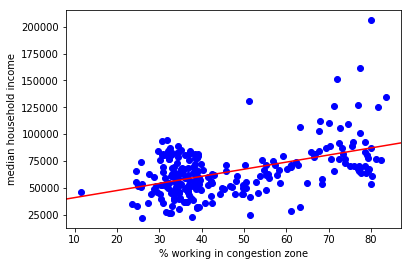

In [943]:
f, ax = plt.subplots()

ax.scatter(taxi_lin['prop_w_in_congest'], taxi_lin['median_household_income'],
                color='b')
mod = smf.ols(formula='median_household_income~prop_w_in_congest', 
              data = taxi_lin).fit()
abline_plot(model_results=mod,ax=ax, color='red')
ax.set_ylabel('median household income')
ax.set_xlabel('% working in congestion zone');

In [944]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     median_household_income   R-squared:                       0.230
Model:                                 OLS   Adj. R-squared:                  0.227
Method:                      Least Squares   F-statistic:                     72.91
Date:                     Sun, 21 Jul 2019   Prob (F-statistic):           1.47e-15
Time:                             20:31:28   Log-Likelihood:                -2792.7
No. Observations:                      246   AIC:                             5589.
Df Residuals:                          244   BIC:                             5596.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          3.426e+04   3827.316      8.952      0.000    2.67e+04    4.18e+04
prop_w_in_congest   660.4571     77.348      8.539      0.000     508.101     812.813
==============================================================================
Omnibus:                       79.161   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              285.534
Skew:                           1.312   Prob(JB):                     9.93e-63
Kurtosis:                       7.580   Cond. No.                         144.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

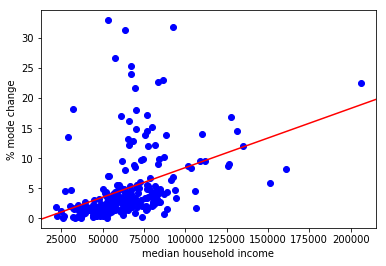

In [945]:
f, ax = plt.subplots()

ax.scatter(taxi_lin['median_household_income'], taxi_lin['perc_ch_cars_10'],
                color='b')
mod = smf.ols(formula='perc_ch_cars_10~median_household_income', 
              data = taxi_lin).fit()
abline_plot(model_results=mod,ax=ax, color='red')
ax.set_xlabel('median household income')
ax.set_ylabel('% mode change');

In [946]:
mod = smf.ols(formula='perc_ch_cars_10~ prop_w_in_congest + median_household_income', 
              data = taxi_lin).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        perc_ch_cars_10   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     130.8
Date:                Sun, 21 Jul 2019   Prob (F-statistic):           2.78e-39
Time:                        20:31:28   Log-Likelihood:                -695.49
No. Observations:                 246   AIC:                             1397.
Df Residuals:                     243   BIC:                             1407.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -7.0741      0.877     -8.067      0.000      -8.801      -5.347
prop_w_in_congest           0.2376      0.018     13.558      0.000       0.203       0.272
median_household_income  1.572e-05   1.27e-05      1.235      0.218   -9.34e-06    4.08e-05
==============================================================================
Omnibus:                      102.286   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              514.218
Skew:                           1.604   Prob(JB):                    2.18e-112
Kurtosis:                       9.315   Cond. No.                     2.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [947]:
taxi_lin.columns

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry', 'all_carssq', 'nest1_all_sq', 'taxi+fhv_sq', 'total_sq',
       'P(mode4)sq', 'P(mode6)sq', 'all_cars10', 'nest1_all_10', 'taxi+fhv_10',
       'total_10', 'P(mode4)10', 'P(mode6)10', 'all_cars275', 'nest1_all_275',
       'taxi+fhv_275', 'total_275', 'P(mode4)275', 'P(mode6)275',
       'ch_nest_1_275', 'ch_nest_1_10', 'ch_cars_10', 'ch_cars_275',
       'perc_ch_nest_1_275', 'perc_ch_nest_1_10', 'perc_ch_275', 'perc_ch_10',
       'perc_ch_cars_275', 'perc_ch_cars_10', 'taxi_zone', 'prop_w_in_congest',
       'perc_private', 'perc_public', 'y_pred', 'dif_from_predict',
       'Unnamed: 0', 'total_count', 'bracket_1', 'bracket_2', 'bracket_3',
       'bracket_4', 'bracket_5', 'bracket_6', 'bracket_7', 'bracket_8',
       'bracket_9', 'bracket10', 'bracket_11', 'median_household_income'],
      dtype='object')

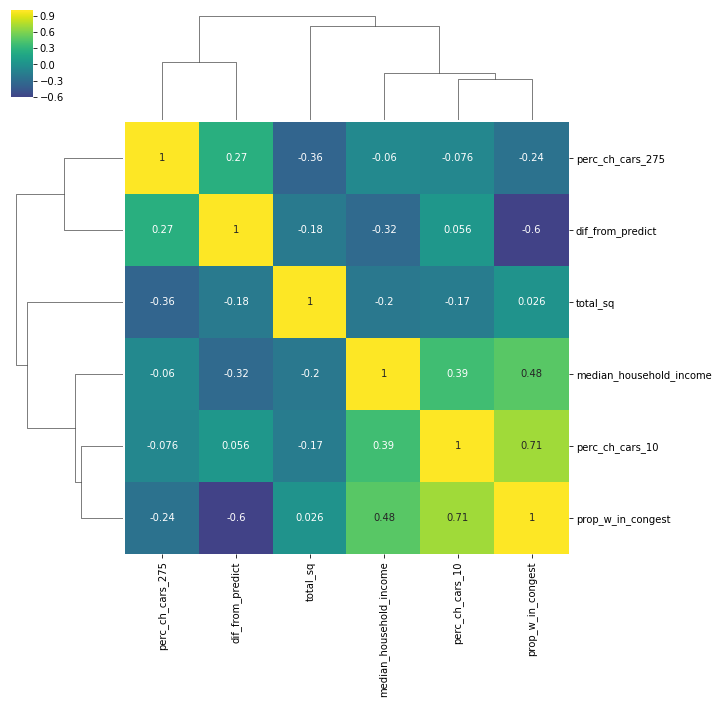

In [948]:
g = sns.clustermap(taxi_lin[['total_sq','median_household_income','perc_ch_cars_10',
                            'perc_ch_cars_275','prop_w_in_congest','dif_from_predict']].corr(),center= 0, cmap= 'viridis', annot= True)

In [949]:
taxi.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,all_carssq,nest1_all_sq,taxi+fhv_sq,total_sq,P(mode4)sq,P(mode6)sq,all_cars10,nest1_all_10,taxi+fhv_10,total_10,P(mode4)10,P(mode6)10,all_cars275,nest1_all_275,taxi+fhv_275,total_275,P(mode4)275,P(mode6)275,ch_nest_1_275,ch_nest_1_10,ch_cars_10,ch_cars_275,perc_ch_nest_1_275,perc_ch_nest_1_10,perc_ch_275,perc_ch_10,perc_ch_cars_275,perc_ch_cars_10,taxi_zone,prop_w_in_congest
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"(POLYGON ((1033269.243591294 172126.0078125, 1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,34.62
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,...",3943.959761,112.299937,112.282368,8706.0,4008.909286,3831.659823,3811.965927,112.299937,112.282368,8706.0,4140.903120,3699.665990,3262.588227,598.837968,597.173971,10762.0,5017.141841,2663.750259,487.0,0.0,-132.0,-681.0,433.66,0.00,5.59,0.0,7.82,1.52,3.0,31.24
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,...",4410.486753,1531.446331,1531.444957,10617.0,3592.415229,2879.040422,1572.712749,76.938337,19.337768,10617.0,6241.153670,1495.774411,6211.490573,131.430873,117.673788,33790.0,25977.794464,6080.059700,-1400.0,-1455.0,-2838.0,1801.0,91.42,95.01,13.19,13.7,16.96,26.73,4.0,68.41
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ...",5043.279390,43.328966,41.423708,8228.0,2794.741855,4999.950424,4853.074192,43.328966,41.423708,8228.0,2983.824216,4809.745226,1560.316241,11.985222,9.004670,8833.0,6511.086411,1548.331020,-31.0,0.0,-190.0,-3483.0,71.55,0.00,0.38,0.0,42.33,2.31,5.0,30.95


In [950]:
taxi['275_quart'] = pd.qcut(taxi.perc_ch_cars_275, 4, labels=False)
taxi['10_quart'] = pd.qcut(taxi.perc_ch_cars_10, 4, labels=False)

In [951]:
taxi.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,all_carssq,nest1_all_sq,taxi+fhv_sq,total_sq,P(mode4)sq,P(mode6)sq,all_cars10,nest1_all_10,taxi+fhv_10,total_10,P(mode4)10,P(mode6)10,all_cars275,nest1_all_275,taxi+fhv_275,total_275,P(mode4)275,P(mode6)275,ch_nest_1_275,ch_nest_1_10,ch_cars_10,ch_cars_275,perc_ch_nest_1_275,perc_ch_nest_1_10,perc_ch_275,perc_ch_10,perc_ch_cars_275,perc_ch_cars_10,taxi_zone,prop_w_in_congest,275_quart,10_quart
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"(POLYGON ((1033269.243591294 172126.0078125, 1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,34.62,NaN,NaN
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,...",3943.959761,112.299937,112.282368,8706.0,4008.909286,3831.659823,3811.965927,112.299937,112.282368,8706.0,4140.903120,3699.665990,3262.588227,598.837968,597.173971,10762.0,5017.141841,2663.750259,487.0,0.0,-132.0,-681.0,433.66,0.00,5.59,0.0,7.82,1.52,3.0,31.24,0.0,1.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,...",4410.486753,1531.446331,1531.444957,10617.0,3592.415229,2879.040422,1572.712749,76.938337,19.337768,10617.0,6241.153670,1495.774411,6211.490573,131.430873,117.673788,33790.0,25977.794464,6080.059700,-1400.0,-1455.0,-2838.0,1801.0,91.42,95.01,13.19,13.7,16.96,26.73,4.0,68.41,1.0,3.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ...",5043.279390,43.328966,41.423708,8228.0,2794.741855,4999.950424,4853.074192,43.328966,41.423708,8228.0,2983.824216,4809.745226,1560.316241,11.985222,9.004670,8833.0,6511.086411,1548.331020,-31.0,0.0,-190.0,-3483.0,71.55,0.00,0.38,0.0,42.33,2.31,5.0,30.95,2.0,1.0


/Users/katharinevoorhees/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


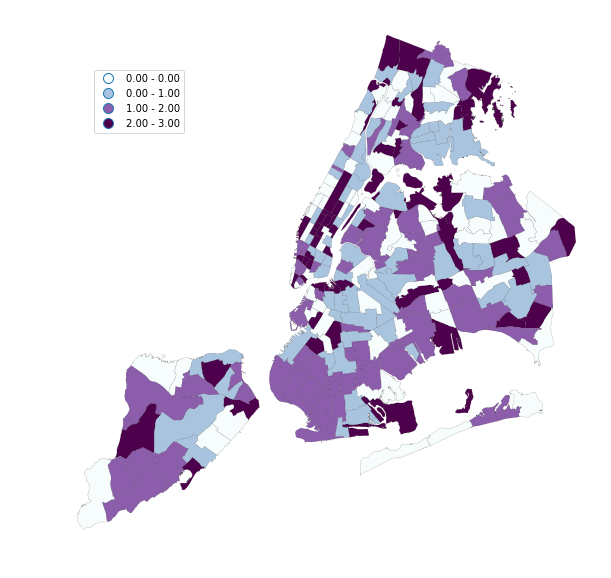

In [952]:
fig = taxi.dropna().plot(column='275_quart',cmap='BuPu',alpha=1, edgecolor='black',
                linewidth=0.1,scheme= 'quantiles', legend=True, k=4, figsize=(10,10))
fig.axis('off');
leg = fig.get_legend()
leg.set_bbox_to_anchor((0,-.1,.25,1))

In [953]:
wages = pd.read_csv('taxi_zone_wages_raw.csv')
wages.head()

,DOlocationID,PUlocationID,LEHD_total_pair_count,2500,7500,12500,17500,22500,30000,42500,62500,87500,125000,225000,median_household_income
0,3.0,4.0,1,0.070217,0.083930,0.116010,0.065062,0.063911,0.082528,0.103498,0.139483,0.068065,0.119664,0.087633,57788.0
1,3.0,5.0,2,0.044209,0.035588,0.066976,0.047745,0.048408,0.114279,0.224580,0.345491,0.212865,0.399867,0.459991,81420.5
2,3.0,6.0,1,0.050462,0.032627,0.046169,0.041018,0.038325,0.068415,0.087890,0.119658,0.118487,0.151192,0.245756,67361.0
3,3.0,7.0,7,0.257919,0.285195,0.333903,0.297581,0.234586,0.423943,0.596832,0.848628,0.724122,1.033718,1.963572,79656.0
4,3.0,9.0,3,0.096439,0.044976,0.077411,0.099034,0.095574,0.175580,0.358945,0.562635,0.358945,0.587286,0.543174,76912.0


In [954]:
wages = wages.groupby('PUlocationID').sum().reset_index()

In [955]:
wages.head()

,PUlocationID,DOlocationID,LEHD_total_pair_count,2500,7500,12500,17500,22500,30000,42500,62500,87500,125000,225000,median_household_income
0,2.0,8017.0,78,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.866667e+10
1,3.0,32429.0,8706,363.938590,522.672868,940.903181,409.488426,601.809957,859.005496,974.030335,1361.894092,851.643907,1074.792094,745.821055,1.396167e+07
2,4.0,31628.0,10617,745.490766,891.081978,1231.680396,690.761223,678.540063,876.204044,1098.841700,1480.885792,722.642510,1270.469296,930.402232,1.352239e+07
3,5.0,32382.0,8229,181.896552,146.426724,275.573276,196.448276,199.176724,470.202586,924.034483,1421.521552,875.831897,1645.254310,1892.633621,1.937808e+07
4,6.0,31051.0,5269,265.886781,171.911330,243.266870,216.122975,201.934122,360.479140,463.091285,630.478632,624.309566,796.632166,1294.887133,1.535831e+07


In [956]:
taxi = taxi.merge(wages, left_on='LocationID', right_on='PUlocationID', how='left')
taxi.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,all_carssq,nest1_all_sq,taxi+fhv_sq,total_sq,P(mode4)sq,P(mode6)sq,all_cars10,nest1_all_10,taxi+fhv_10,total_10,P(mode4)10,P(mode6)10,all_cars275,nest1_all_275,taxi+fhv_275,total_275,P(mode4)275,P(mode6)275,ch_nest_1_275,ch_nest_1_10,ch_cars_10,ch_cars_275,perc_ch_nest_1_275,perc_ch_nest_1_10,perc_ch_275,perc_ch_10,perc_ch_cars_275,perc_ch_cars_10,taxi_zone,prop_w_in_congest,275_quart,10_quart,PUlocationID,DOlocationID,LEHD_total_pair_count,2500,7500,12500,17500,22500,30000,42500,62500,87500,125000,225000,median_household_income
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"(POLYGON ((1033269.243591294 172126.0078125, 1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,34.62,NaN,NaN,2.0,8017.0,78.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.866667e+10
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,...",3943.959761,112.299937,112.282368,8706.0,4008.909286,3831.659823,3811.965927,112.299937,112.282368,8706.0,4140.903120,3699.665990,3262.588227,598.837968,597.173971,10762.0,5017.141841,2663.750259,487.0,0.0,-132.0,-681.0,433.66,0.00,5.59,0.0,7.82,1.52,3.0,31.24,0.0,1.0,3.0,32429.0,8706.0,363.938590,522.672868,940.903181,409.488426,601.809957,859.005496,974.030335,1361.894092,851.643907,1074.792094,745.821055,1.396167e+07
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,...",4410.486753,1531.446331,1531.444957,10617.0,3592.415229,2879.040422,1572.712749,76.938337,19.337768,10617.0,6241.153670,1495.774411,6211.490573,131.430873,117.673788,33790.0,25977.794464,6080.059700,-1400.0,-1455.0,-2838.0,1801.0,91.42,95.01,13.19,13.7,16.96,26.73,4.0,68.41,1.0,3.0,4.0,31628.0,10617.0,745.490766,891.081978,1231.680396,690.761223,678.540063,876.204044,1098.841700,1480.885792,722.642510,1270.469296,930.402232,1.352239e+07
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ...",5043.279390,43.328966,41.423708,8228.0,2794.741855,4999.950424,4853.074192,43.328966,41.423708,8228.0,2983.824216,4809.745226,1560.316241,11.985222,9.004670,8833.0,6511.086411,1548.331020,-31.0,0.0,-190.0,-3483.0,71.55,0.00,0.38,0.0,42.33,2.31,5.0,30.95,2.0,1.0,5.0,32382.0,8229.0,181.896552,146.426724,275.573276,196.448276,199.176724,470.202586,924.034483,1421.521552,875.831897,1645.254310,1892.633621,1.937808e+07


In [957]:
taxi_wages = taxi[['OBJECTID','geometry','LocationID','borough','275_quart', '10_quart','2500', '7500', '12500',
       '17500', '22500', '30000', '42500', '62500', '87500', '125000',
       '225000']].dropna()
taxi_wages.head()

,OBJECTID,geometry,LocationID,borough,275_quart,10_quart,2500,7500,12500,17500,22500,30000,42500,62500,87500,125000,225000
2,3,"POLYGON ((1026308.769506663 256767.6975403726,...",3,Bronx,0.0,1.0,363.938590,522.672868,940.903181,409.488426,601.809957,859.005496,974.030335,1361.894092,851.643907,1074.792094,745.821055
3,4,"POLYGON ((992073.4667968601 203714.0759887695,...",4,Manhattan,1.0,3.0,745.490766,891.081978,1231.680396,690.761223,678.540063,876.204044,1098.841700,1480.885792,722.642510,1270.469296,930.402232
4,5,"POLYGON ((935843.3104932606 144283.335850656, ...",5,Staten Island,2.0,1.0,181.896552,146.426724,275.573276,196.448276,199.176724,470.202586,924.034483,1421.521552,875.831897,1645.254310,1892.633621
5,6,"POLYGON ((966568.7466657609 158679.854687795, ...",6,Staten Island,3.0,1.0,265.886781,171.911330,243.266870,216.122975,201.934122,360.479140,463.091285,630.478632,624.309566,796.632166,1294.887133
6,7,"POLYGON ((1010804.217962816 218919.6406951398,...",7,Queens,2.0,2.0,1351.791120,1494.750325,1750.034619,1559.665474,1229.497787,2221.945871,3128.083552,4447.781789,3795.226508,5417.862107,10291.360848


In [958]:
sums = taxi_wages.iloc[:,6:].sum(axis = 0, skipna = True)
sums_4 = taxi_wages[taxi_wages['275_quart'] == 0].iloc[:,6:].sum(axis = 0, skipna = True)
sums_10 = taxi_wages[taxi_wages['10_quart'] == 3].iloc[:,6:].sum(axis = 0, skipna = True)

In [959]:
brackets = ['$0','$5,000','$10,000','$15,000','$20,000','$25,000','$35,000','$50,000',
            '$75,000','$100,000','> $150,000']

In [960]:
widths = np.asarray([.5,.5,.5,.6,.6,.7,.5,.8,.9,1,1])

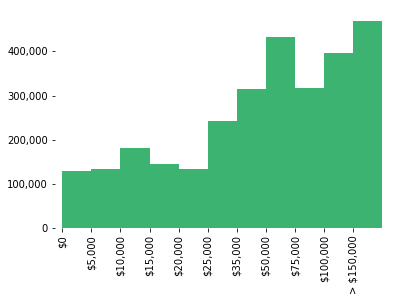

In [961]:
fig, ax = plt.subplots()
sums.plot.bar(color='#3CB371',ax=ax, width=1, align='edge')

ax.axis=('off')
plt.box(on=None)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set_xticklabels(brackets);
#ax.xaxis.set_major_locator(arranged.all());


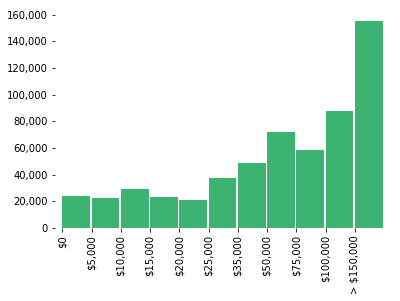

In [962]:
fig, ax = plt.subplots()
sums_10.plot.bar(color='#3CB371',ax=ax, width=(.95), align='edge')
ax.axis=('off')
plt.box(on=None)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set_xticklabels(brackets);


In [963]:
income_even_split = taxi_wages[['LocationID','275_quart',
       '10_quart', '2500', '7500', '12500', '17500', '22500', '30000', '42500',
       '62500', '87500', '125000', '225000']]

In [964]:
income_even_split['1'] = income_even_split['2500'] + income_even_split['7500'] +\
            income_even_split['12500'] + income_even_split['17500']\
            + income_even_split['22500']
income_even_split['2'] = income_even_split['30000'] + income_even_split['42500']
income_even_split['3'] = income_even_split['62500']
income_even_split['4'] = income_even_split['87500']
income_even_split['5'] = income_even_split['125000']/2
income_even_split['6'] = income_even_split['125000']/2
income_even_split['7'] = income_even_split['225000']/6
income_even_split['8'] = income_even_split['225000']/6
income_even_split['9'] = income_even_split['225000']/6
income_even_split['10'] = income_even_split['225000']/6
income_even_split['11'] = income_even_split['225000']/6
income_even_split['12'] = income_even_split['225000']/6

/Users/katharinevoorhees/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/katharinevoorhees/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [965]:
income_even_split.iloc[13].sum()/6 - income_even_split.iloc[13].sum()

-21630.0

In [966]:
income_even_split.head()

,LocationID,275_quart,10_quart,2500,7500,12500,17500,22500,30000,42500,62500,87500,125000,225000,1,2,3,4,5,6,7,8,9,10,11,12
2,3,0.0,1.0,363.938590,522.672868,940.903181,409.488426,601.809957,859.005496,974.030335,1361.894092,851.643907,1074.792094,745.821055,2838.813022,1833.035831,1361.894092,851.643907,537.396047,537.396047,124.303509,124.303509,124.303509,124.303509,124.303509,124.303509
3,4,1.0,3.0,745.490766,891.081978,1231.680396,690.761223,678.540063,876.204044,1098.841700,1480.885792,722.642510,1270.469296,930.402232,4237.554427,1975.045743,1480.885792,722.642510,635.234648,635.234648,155.067039,155.067039,155.067039,155.067039,155.067039,155.067039
4,5,2.0,1.0,181.896552,146.426724,275.573276,196.448276,199.176724,470.202586,924.034483,1421.521552,875.831897,1645.254310,1892.633621,999.521552,1394.237069,1421.521552,875.831897,822.627155,822.627155,315.438937,315.438937,315.438937,315.438937,315.438937,315.438937
5,6,3.0,1.0,265.886781,171.911330,243.266870,216.122975,201.934122,360.479140,463.091285,630.478632,624.309566,796.632166,1294.887133,1099.122078,823.570425,630.478632,624.309566,398.316083,398.316083,215.814522,215.814522,215.814522,215.814522,215.814522,215.814522
6,7,2.0,2.0,1351.791120,1494.750325,1750.034619,1559.665474,1229.497787,2221.945871,3128.083552,4447.781789,3795.226508,5417.862107,10291.360848,7385.739324,5350.029423,4447.781789,3795.226508,2708.931054,2708.931054,1715.226808,1715.226808,1715.226808,1715.226808,1715.226808,1715.226808


In [967]:
a = income_even_split.iloc[:,14:].sum(axis = 0, skipna = True)

In [968]:
a

1     724520.789316
2     557860.767855
3     432233.013898
4     317135.302736
5     198406.129847
6     198406.129847
7      78127.644417
8      78127.644417
9      78127.644417
10     78127.644417
11     78127.644417
12     78127.644417
dtype: float64

In [969]:
adjusted_brackets = ['$0','$25,000','$50,000','$75,000','$100,000','', '$150,000',
                    '','','','','']

In [970]:
a_sums_4 = income_even_split[income_even_split['275_quart'] == 3].iloc[:,14:].sum(axis = 0, skipna = True)
a_sums_10 = income_even_split[income_even_split['10_quart'] == 3].iloc[:,14:].sum(axis = 0, skipna = True)

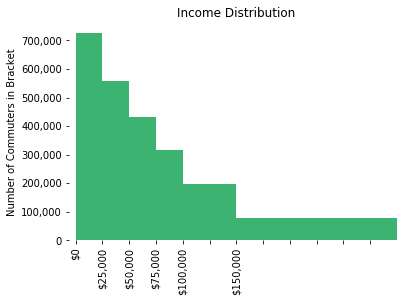

In [971]:
fig, ax = plt.subplots()
a.plot.bar(color='#3CB371',ax=ax, width=(1), align='edge')
ax.axis=('off')
plt.box(on=None)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set_xticklabels(adjusted_brackets)
plt.ylabel("Number of Commuters in Bracket", fontsize=(10))
plt.title("Income Distribution");

## Distribution of mode shift by wage

In [972]:
os.chdir('/Users/katharinevoorhees/GitHub/Manhattan-Congestion-Surcharge-Capstone/results/Final_results/')
!ls

older
readme.md
results_pop_under_wage2_.03_1.5.csv
results_pop_under_wage2_0.05_1.5.csv
results_pop_under_wage3_0.05_1.5.csv
results_pop_under_wage_0.05_1.5.csv
results_pop_under_wage_scenario2_with_scenario1_0.05_1.5.csv
results_pop_under_wage_scenario3_with_scenario1_0.05_1.5.csv
results_scenario1_0.03_1.5.csv
results_scenario1_0.05_1.5.csv
results_scenario2_.03_1.5.csv
results_scenario2_0.03_1.5.csv
results_scenario2_0.05_1.5.csv
results_scenario2_with_scenario1_0.05_1.5.csv
results_scenario3_0.03_1.5.csv
results_scenario3_0.05_1.5.csv
results_scenario3_with_scenario1_0.05_1.5.csv


In [973]:
pop_wage1 = pd.read_csv('results_pop_under_wage_.05_1.5.csv')
pop_wage2 = pd.read_csv('results_pop_under_wage2_0.05_1.5.csv')
pop_wage3 = pd.read_csv('results_pop_under_wage3_0.05_1.5.csv')

FileNotFoundError: File b'results_pop_under_wage_.05_1.5.csv' does not exist

In [ ]:
print(pop_wage1.shape)
print(pop_wage2.shape)
print(pop_wage3.shape)

In [ ]:
change_array = pop_wage1.sort_values('ODpair').iloc[:,3:].values -\
            pop_wage2.sort_values('ODpair').iloc[:,4:].values
array_labels = pop_wage1.sort_values('ODpair').values

In [ ]:
df = pd.DataFrame(change_array, columns=['ch_2_1', 'ch_2_2', 'ch_2_3', 'ch_2_4', 
                                'ch_2_5', 'ch_2_6'])
pop_wage1 = pd.concat([pop_wage1, df])
pop_wage1.head()

## make more census data maps (disability, age)

In [974]:
results_sq = pd.read_csv('results_scenario1_0.05_1.5.csv')
results_275 = pd.read_csv('results_scenario2_0.05_1.5.csv')
results_10 = pd.read_csv('results_scenario3_with_scenario1_0.05_1.5.csv')


In [982]:
os.chdir('/Users/katharinevoorhees/GitHub/Manhattan-Congestion-Surcharge-Capstone/modeling/')

onesix = pd.read_csv('results_scenario1_.05_1.6_for_uncertainty.csv')

In [985]:
acs = pd.read_csv('final_acs_transportation_choice.csv')
acs.head()

,taxi_zone,P(mode1),P(mode2),P(mode3),P(mode4),P(mode5),P(mode6)
0,3.0,0.115434,17.843262,7.334361,3885.402712,478.622467,4316.681764
1,4.0,42.851015,140.891180,84.609811,6937.780033,2631.714648,779.153313
2,5.0,0.081377,13.158607,2.120444,1860.706347,40.495673,6312.437553
3,6.0,0.109017,7.637848,1.878344,1974.772111,198.118892,3086.483787
4,7.0,25.522468,142.614028,37.582529,28436.765508,2680.397880,5365.117587


In [979]:
results_sq.iloc[:,1:].sum(axis=0)

P(mode1)    5.696786e+04
P(mode2)    6.993359e+03
P(mode3)    2.557339e+03
P(mode4)    1.448266e+06
P(mode5)    2.281302e+05
P(mode6)    1.138436e+06
dtype: float64

In [984]:
onesix.iloc[:,1:].sum(axis=0)

P(mode1)    5.015706e+04
P(mode2)    6.035482e+03
P(mode3)    1.897527e+03
P(mode4)    1.453372e+06
P(mode5)    2.286648e+05
P(mode6)    1.141224e+06
dtype: float64

In [986]:
acs.iloc[:,1:].sum(axis=0)

P(mode1)    9.720936e+03
P(mode2)    1.475381e+04
P(mode3)    5.745300e+03
P(mode4)    1.756041e+06
P(mode5)    3.071924e+05
P(mode6)    7.865649e+05
dtype: float64